<a href="https://colab.research.google.com/github/ignadv1986/CRISPR-Screen-Analysis-with-MAGeCK-and-DrugZ/blob/main/Drugz_analysis_of_TOP2i_CRISPR_Cas9_screen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load and merge Drugz-generated files
etp = pd.read_csv("drugz_ETP_vs_untreated.txt", sep="\t")
icrf = pd.read_csv("drugz_ICRF_vs_untreated.txt", sep="\t")
merged = etp[['GENE', 'normZ']].merge(icrf[['GENE', 'normZ']], on='GENE', suffixes=('_ETP', '_ICRF'))

In [ ]:
#Convert to excel and download
merged.to_excel("merged_normZ_ETP_ICRF.xlsx", index=False)
from google.colab import files
files.download("merged_normZ_ETP_ICRF.xlsx")

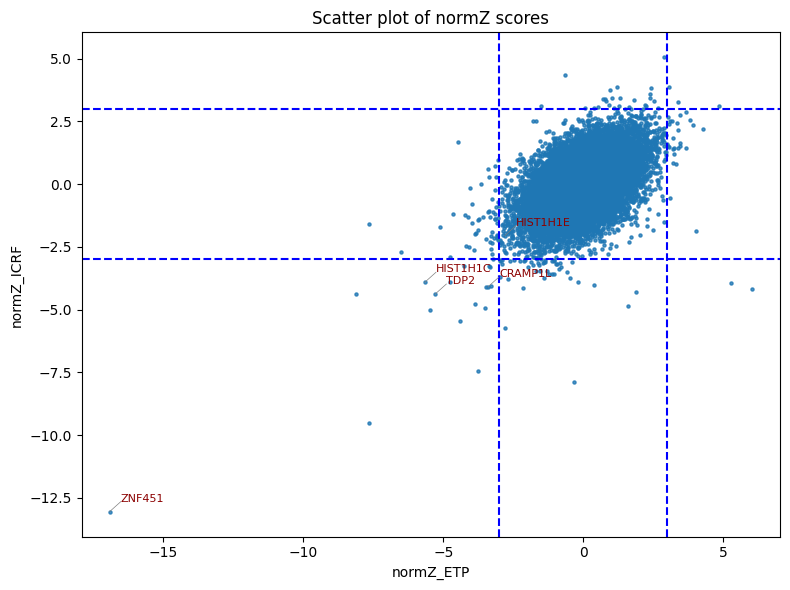

In [ ]:
#Read file and plot
merged_normZ_ETP_ICRF = pd.read_excel("merged_normZ_ETP_ICRF.xlsx")

x = merged_normZ_ETP_ICRF['normZ_ETP']
y = merged_normZ_ETP_ICRF['normZ_ICRF']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=5, alpha=0.8)

# Dashed threshold lines
plt.axhline(y=3, linestyle='--', color='blue')
plt.axhline(y=-3, linestyle='--', color='blue')
plt.axvline(x=3, linestyle='--', color='blue')
plt.axvline(x=-3, linestyle='--', color='blue')

# Axis labels
plt.xlabel("normZ_ETP")
plt.ylabel("normZ_ICRF")

# Axis limits (optional)
plt.xlim(min(x) - 1, max(x) + 1)
plt.ylim(min(y) - 1, max(y) + 1)

# Genes to label
genes_to_label = ["TDP2", "CRAMP1L", "ZNF451", "HIST1H1E", "HIST1H1C"]

for _, row in merged_normZ_ETP_ICRF.iterrows():
    if row['GENE'] in genes_to_label:
        x_val = row['normZ_ETP']
        y_val = row['normZ_ICRF']
        label_offset_x = 0.4
        label_offset_y = 0.4
        # Draw line from point to label
        plt.plot([x_val, x_val + label_offset_x], [y_val, y_val + label_offset_y],
                 color='gray', linewidth=0.5)
        # Add label
        plt.text(x_val + label_offset_x, y_val + label_offset_y,
                 row['GENE'], fontsize=8, color='darkred')

plt.title("Scatter plot of normZ scores")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

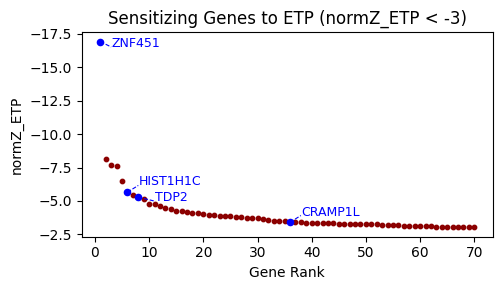

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
#Plot individual screens
#Factors sensitizing to ETP
screen = pd.read_csv("drugz_ETP_vs_untreated.txt", sep="\t")
sensitizing_factors_ETP = screen[screen["normZ"] < -3].sort_values("normZ", ascending=True)
sensitizing_factors_ETP = sensitizing_factors_ETP.reset_index(drop=True)
sensitizing_factors_ETP['Rank'] = sensitizing_factors_ETP.index + 1

# Genes to highlight
genes_to_label = ["TDP2", "CRAMP1L", "ZNF451", "HIST1H1E", "HIST1H1C"]


ETP_drugZ_sensitizing_factors = plt.figure()
plt.figure(figsize=(5, 3))

# Plot all points in dark red
plt.scatter(sensitizing_factors_ETP['Rank'], sensitizing_factors_ETP['normZ'], color='darkred', s=10)

# Highlight selected genes in blue
highlight = sensitizing_factors_ETP[sensitizing_factors_ETP['GENE'].isin(genes_to_label)]
plt.scatter(highlight['Rank'], highlight['normZ'], color='blue', s=20)

# Add labels and connecting lines
for gene in genes_to_label:
    gene_row = sensitizing_factors_ETP[sensitizing_factors_ETP['GENE'] == gene]
    if gene_row.empty:
        continue  # Skip if gene not found
    x_dot = gene_row['Rank'].values[0]
    y_dot = gene_row['normZ'].values[0]
    if gene == 'ZNF451':
        x_text = x_dot + 2
        y_text = y_dot + 0.4
    elif gene == 'TDP2':
        x_text = x_dot + 3
        y_text = y_dot + 0.3
    else:
        x_text = x_dot + 2
        y_text = y_dot - 0.5

    # Plot label
    plt.text(x_text, y_text, gene, fontsize=9, color='blue')
    # Draw line from dot to label
    plt.plot([x_dot, x_text], [y_dot, y_text], color='blue', linewidth=0.8, linestyle='--')

plt.xlabel("Gene Rank")
plt.ylabel("normZ_ETP")
plt.title("Sensitizing Genes to ETP (normZ_ETP < -3)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
plt.savefig("DrugZ_sensitizing_genes_to_ETP.png", dpi=300)
from google.colab import files
files.download("DrugZ_sensitizing_genes_to_ETP.png")

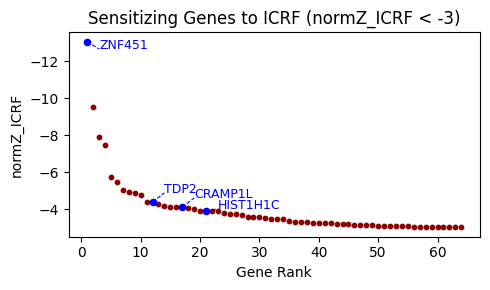

In [ ]:
#Factors sensitizing to ICRF
screen = pd.read_csv("drugz_ICRF_vs_untreated.txt", sep="\t")
sensitizing_factors_ETP = screen[screen["normZ"] < -3].sort_values("normZ", ascending=True)
sensitizing_factors_ETP = sensitizing_factors_ETP.reset_index(drop=True)
sensitizing_factors_ETP['Rank'] = sensitizing_factors_ETP.index + 1

# Genes to highlight
genes_to_label = ["TDP2", "CRAMP1L", "ZNF451", "HIST1H1E", "HIST1H1C"]

plt.figure(figsize=(5, 3))

# Plot all points in dark red
plt.scatter(sensitizing_factors_ETP['Rank'], sensitizing_factors_ETP['normZ'], color='darkred', s=10)

# Highlight selected genes in blue
highlight = sensitizing_factors_ETP[sensitizing_factors_ETP['GENE'].isin(genes_to_label)]
plt.scatter(highlight['Rank'], highlight['normZ'], color='blue', s=20)

# Add labels and connecting lines
for gene in genes_to_label:
    gene_row = sensitizing_factors_ETP[sensitizing_factors_ETP['GENE'] == gene]
    if gene_row.empty:
        continue  # Skip if gene not found
    x_dot = gene_row['Rank'].values[0]
    y_dot = gene_row['normZ'].values[0]
    if gene == 'ZNF451':
        x_text = x_dot + 2
        y_text = y_dot + 0.4
    elif gene == "TDP2":
        x_text = x_dot + 2
        y_text = y_dot - 0.5
    elif gene == "HIST1H1C":
        x_text = x_dot + 2
        y_text = y_dot - 0.1
    else:
        x_text = x_dot + 2
        y_text = y_dot - 0.5

    # Plot label
    plt.text(x_text, y_text, gene, fontsize=9, color='blue')
    # Draw line from dot to label
    plt.plot([x_dot, x_text], [y_dot, y_text], color='blue', linewidth=0.8, linestyle='--')

plt.xlabel("Gene Rank")
plt.ylabel("normZ_ICRF")
plt.title("Sensitizing Genes to ICRF (normZ_ICRF < -3)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()